In [254]:
import numpy as np
import pandas as pd
import scipy

In [255]:
from IPython.core.interactiveshell import InteractiveShell

# to make jupyter print all outputs, not just the last one
InteractiveShell.ast_node_interactivity = "all" 

# to pretty print pandas df and be able to copy them over (e.g. to ppt slides)
from IPython.core.display import HTML 

# For plotting
from plotnine import *

In [256]:
import csv

deleted_rows_count = 0  # Variable to keep track of the number of deleted rows

# Open the CSV file with 'errors' set to 'ignore' to handle decoding issues
with open("car_prices.csv", 'r', errors='ignore') as file:
    
    # Use csv.reader to read the CSV file
    csv_reader = csv.reader(file)
    
    # Initialise lists to store valid lines and deleted lines
    valid_lines = []
    deleted_lines = []
    
    # Iterate through each line in the CSV file
    for line in csv_reader:
        if len(line) == 16:
            # If the line has 16 fields, add it to the list of valid lines
            valid_lines.append(line)
        else:
            # If the line has a different number of fields, add it to the list of deleted lines
            deleted_lines.append(line)
            deleted_rows_count += 1  # Increment the count of deleted rows

# Create a DataFrame from the valid lines
prices_df = pd.DataFrame(valid_lines[1:], columns=valid_lines[0])

# Print the number of deleted rows
print(f"Number of deleted rows: {deleted_rows_count}")

Number of deleted rows: 23


In [257]:
print(f"There are {prices_df.shape[0]} rows and {prices_df.shape[1]} columns in the dataset")

There are 558808 rows and 16 columns in the dataset


In [258]:
# Check top of file
prices_df.head()
# Check bottom of file
prices_df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558803,2015,Kia,K900,Luxury,Sedan,,knalw4d4xf6019304,in,4.5,18255,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558804,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5,54393,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558805,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558806,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558807,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT)


In [259]:
# Adding 'id' as a column header
prices_df.insert(0, 'id', prices_df.index)

# Display the modified DataFrame
print(prices_df)

            id  year    make                model         trim       body  \
0            0  2015     Kia              Sorento           LX        SUV   
1            1  2015     Kia              Sorento           LX        SUV   
2            2  2014     BMW             3 Series   328i SULEV      Sedan   
3            3  2015   Volvo                  S60           T5      Sedan   
4            4  2014     BMW  6 Series Gran Coupe         650i      Sedan   
...        ...   ...     ...                  ...          ...        ...   
558803  558803  2015     Kia                 K900       Luxury      Sedan   
558804  558804  2012     Ram                 2500  Power Wagon   Crew Cab   
558805  558805  2012     BMW                   X5    xDrive35d        SUV   
558806  558806  2015  Nissan               Altima        2.5 S      sedan   
558807  558807  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state condition odometer   color  \


In [260]:
# Drop duplicates
prices_df.drop_duplicates(subset=['id']).shape[0] == prices_df.shape[0]

True

In [261]:
prices_df = prices_df.set_index("id")
prices_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
id,,,,,,,,,,,,,,,,
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [263]:
# Replace empty strings with NaN for all columns
for col in prices_df.columns:
    prices_df[col] = prices_df[col].replace('', np.nan)

In [264]:
# Check in which columns nans are to now which column needs to be a float instead of int
nan_columns = prices_df.isna().any()
print(nan_columns)

year            False
make             True
model            True
trim             True
body             True
transmission     True
vin             False
state           False
condition        True
odometer         True
color            True
interior         True
seller          False
mmr             False
sellingprice    False
saledate        False
dtype: bool


In [ ]:
# Count the number of rows with null values
n_null_rows = prices_df.loc[lambda x: x.isnull().any(axis=1)].shape
print(f"There are {n_null_rows[0]} rows with null values in this dataset")

# Identify columns with null values
columns_with_nulls = prices_df.columns[prices_df.isnull().any()].tolist()
print(f"Columns with null values: {columns_with_nulls}")

There are 94 rows with null values in this dataset
Columns with null values: ['odometer']


In [ ]:
# Imputation year, make, model
prices_df['odometer'] = prices_df.groupby(['year', 'make', 'model'])['odometer'].transform(lambda x: x.fillna(x.median()))

# Imputation year, make
prices_df['odometer'] = prices_df.groupby(['year', 'make'])['odometer'].transform(lambda x: x.fillna(x.median()))

# Count the number of rows with null values after imputation
n_null_rows = prices_df.loc[lambda x: x.isnull().any(axis=1)].shape[0]
print(f"There are {n_null_rows} rows with null values in this dataset.")

There are 558808 rows with null values in this dataset.


In [ ]:
# colums to integer type
for i in [x for x in prices_df.columns if x not in ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'condition', 'color', 'interior', 'seller', 'saledate'] ]:
    prices_df[i]= prices_df[i].astype(int)

ValueError: cannot convert float NaN to integer

In [ ]:
prices_df.dtypes

year             int64
make            object
model           object
trim            object
body            object
transmission    object
vin             object
state           object
condition       object
odometer         int64
color           object
interior        object
seller          object
mmr              int64
sellingprice     int64
saledate        object
dtype: object

In [ ]:
prices_df[[ 'make', 'model', 'trim', 'body', 'transmission', 'state', 'condition', 'color', 'interior', 'seller', 'saledate']].describe()

,make,model,trim,body,transmission,state,condition,color,interior,seller,saledate
count,558808,558808,558808,558808,558808,558808,558808,558808,558808,558808,558808
unique,97,974,1976,87,3,38,42,21,18,14264,3745
top,Ford,Altima,Base,Sedan,automatic,fl,1.9,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199435,475912,82945,42281,110969,244325,19693,5334


In [ ]:
prices_df['transmission'].unique()

array(['automatic', '', 'manual'], dtype=object)

In [ ]:
# Filter out the blank entries and count the occurrences of each transmission type
transmission_counts = prices_df[prices_df['transmission'].str.strip() != '']['transmission'].value_counts(normalize=True)
# Calculate the probabilities
probabilities = transmission_counts.values
# Replace blank spaces with NaN for easier handling
prices_df['transmission'] = prices_df['transmission'].replace('', np.nan)
# Find indices where transmission is NaN
nan_indices = prices_df[prices_df['transmission'].isna()].index
# Generate random choices based on the distribution of 'automatic' and 'manual'
random_transmissions = np.random.choice(transmission_counts.index, size=len(nan_indices), p=probabilities)
# Assign these random values to NaN entries
prices_df.loc[nan_indices, 'transmission'] = random_transmissions


# Filter out the blank entries and count the occurrences of each color
color_counts = prices_df[prices_df['color'].str.strip() != '']['color'].value_counts(normalize=True)
# Calculate the probabilities
probabilities = color_counts.values
# Replace blank spaces with NaN for easier handling
prices_df['color'] = prices_df['color'].replace('', np.nan)
prices_df['color'] = prices_df['color'].replace('—', np.nan)
# Find indices where color is NaN
nan_indices = prices_df[prices_df['color'].isna()].index
# Generate random choices based on the distribution of colors
random_colors = np.random.choice(color_counts.index, size=len(nan_indices), p=probabilities)
# Assign these random values to NaN entries
prices_df.loc[nan_indices, 'colors'] = random_colors

In [ ]:
prices_df['transmission'].unique()

array(['automatic', 'manual'], dtype=object)

In [ ]:
prices_df.describe()

,year,odometer,mmr,sellingprice
count,558808.000000,558808.000000,558808.000000,558808.000000
mean,2010.038686,68333.366351,13769.321171,13611.260463
std,3.966820,53401.270876,9679.899269,9749.681601
min,1982.000000,1.000000,25.000000,1.000000
25%,2007.000000,28377.000000,7100.000000,6900.000000
50%,2012.000000,52268.500000,12250.000000,12100.000000
75%,2013.000000,99133.000000,18300.000000,18200.000000
max,2015.000000,999999.000000,182000.000000,230000.000000


In [ ]:
(
    prices_df.groupby('transmission')
    .size()
    .reset_index(name='N')
    .assign(total = lambda x: x.N.sum())
    .assign(p = lambda x: x.N / x.total * 100)
)

,transmission,N,total,p
0,automatic,538978,558808,96.451375
1,manual,19830,558808,3.548625


In [ ]:
def generate_freq_table(df, variable = ['transmission', 'color']):
    dfs = []
    for i in variable:
        df_count = (
            df.groupby(i, observed=False)
            .size()
            .reset_index(name='N')
            .assign(var = i)
            .rename(columns={i: 'category'})
        )
        dfs.append(df_count)
        res = pd.concat(dfs)
        res['category'] = res['category'].astype(str)
    return res
generate_freq_table(prices_df, ['transmission', 'color'])

,category,N,var
0,automatic,538978,transmission
1,manual,19830,transmission
0,beige,9222,color
1,black,110969,color
2,blue,51138,color
3,brown,6717,color
4,burgundy,8972,color
5,charcoal,479,color
6,gold,11342,color
7,gray,82856,color


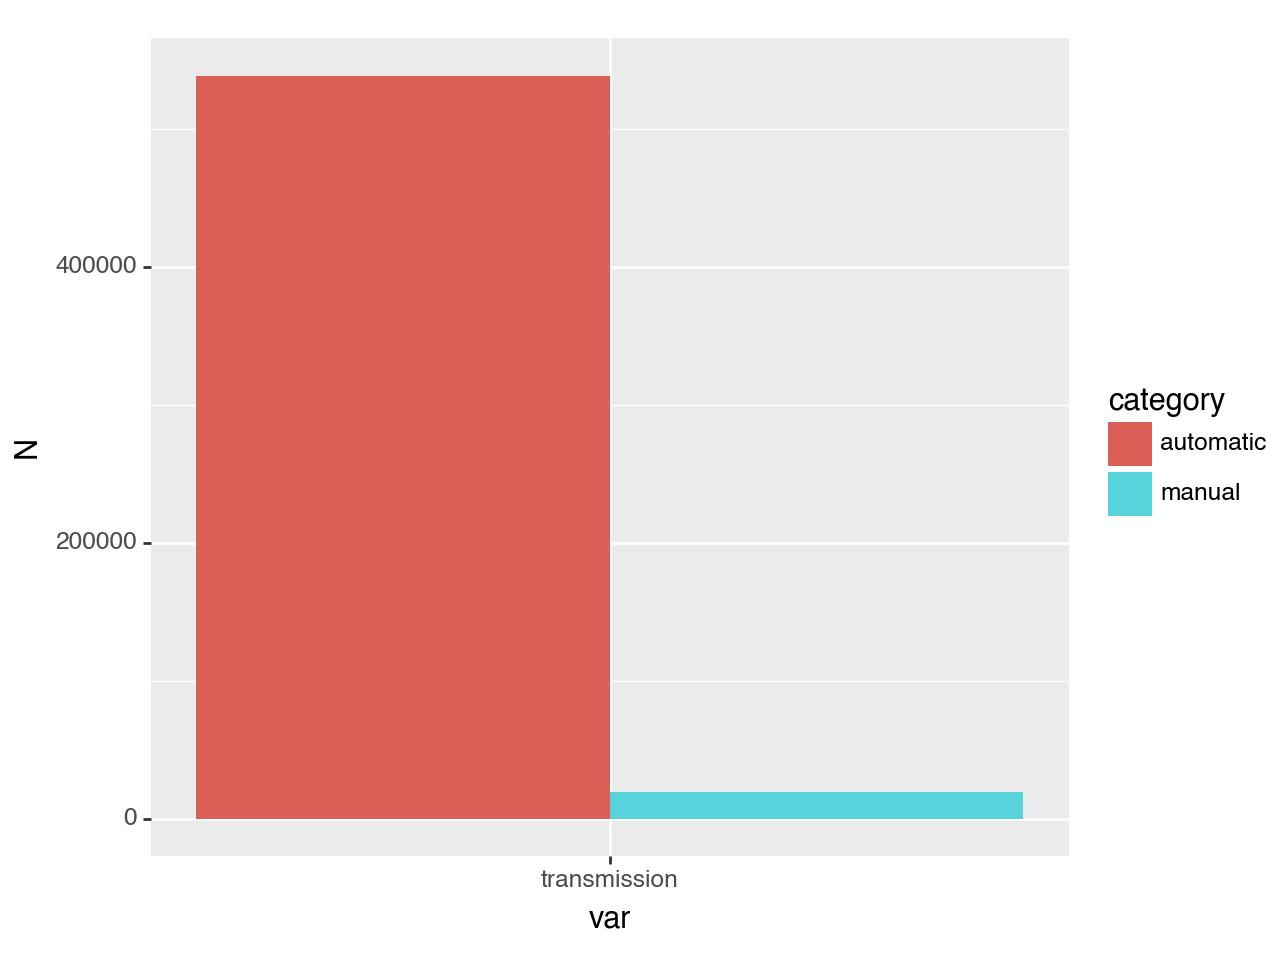

<Figure Size: (640 x 480)>

In [ ]:
def generate_freq_plot(freq_table):
    return (
        ggplot(freq_table, aes(x='var', y='N', fill='category')) +
        geom_col(stat='identity', position='dodge')
    )
generate_freq_plot(generate_freq_table((prices_df), [ 'transmission']))

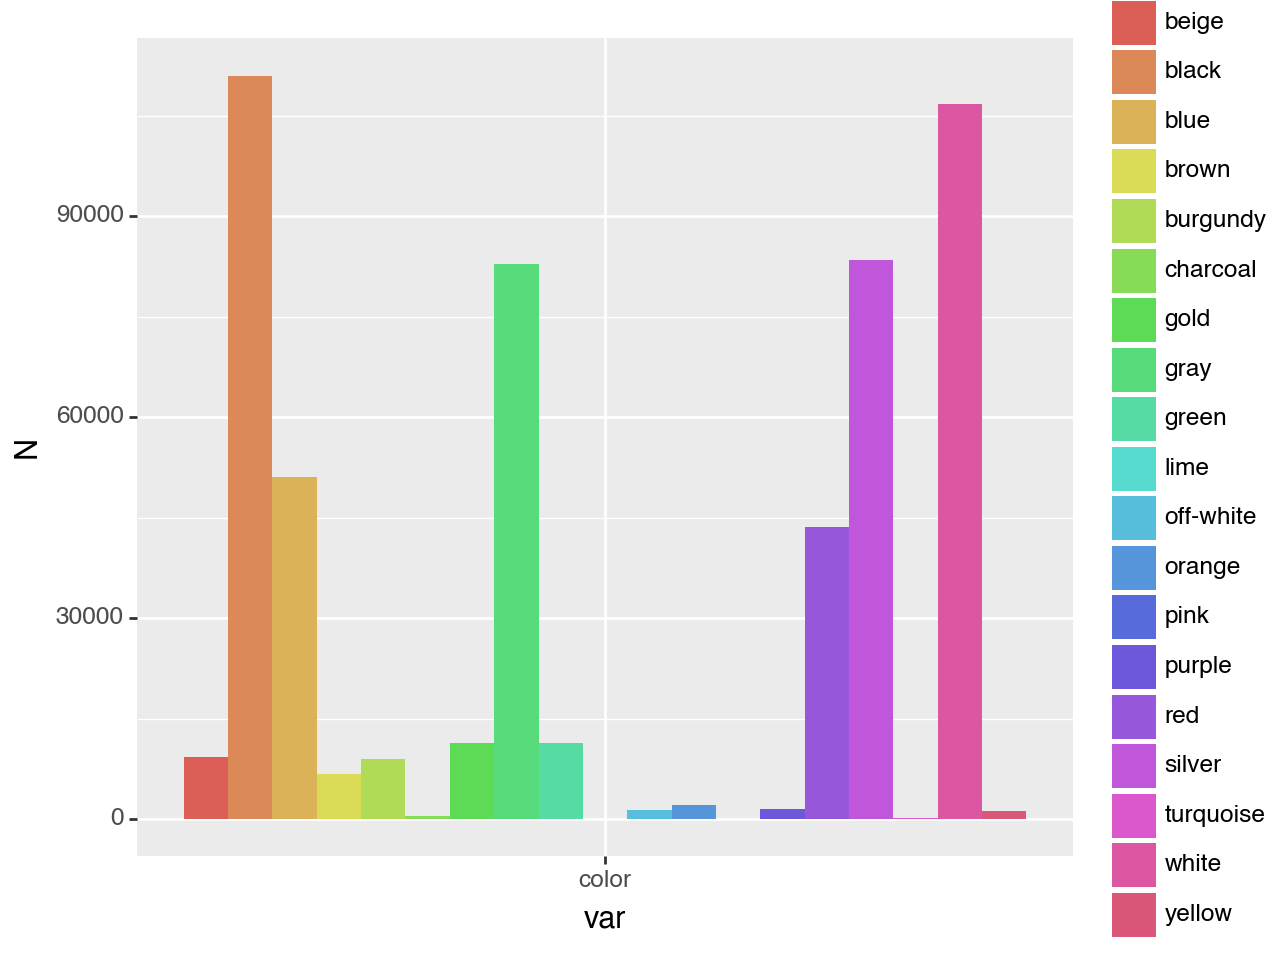

<Figure Size: (640 x 480)>

In [ ]:
def generate_freq_plot(freq_table):
    return (
        ggplot(freq_table, aes(x='var', y='N', fill='category')) +
        geom_col(stat='identity', position='dodge')
    )
generate_freq_plot(generate_freq_table((prices_df), [ 'color']))

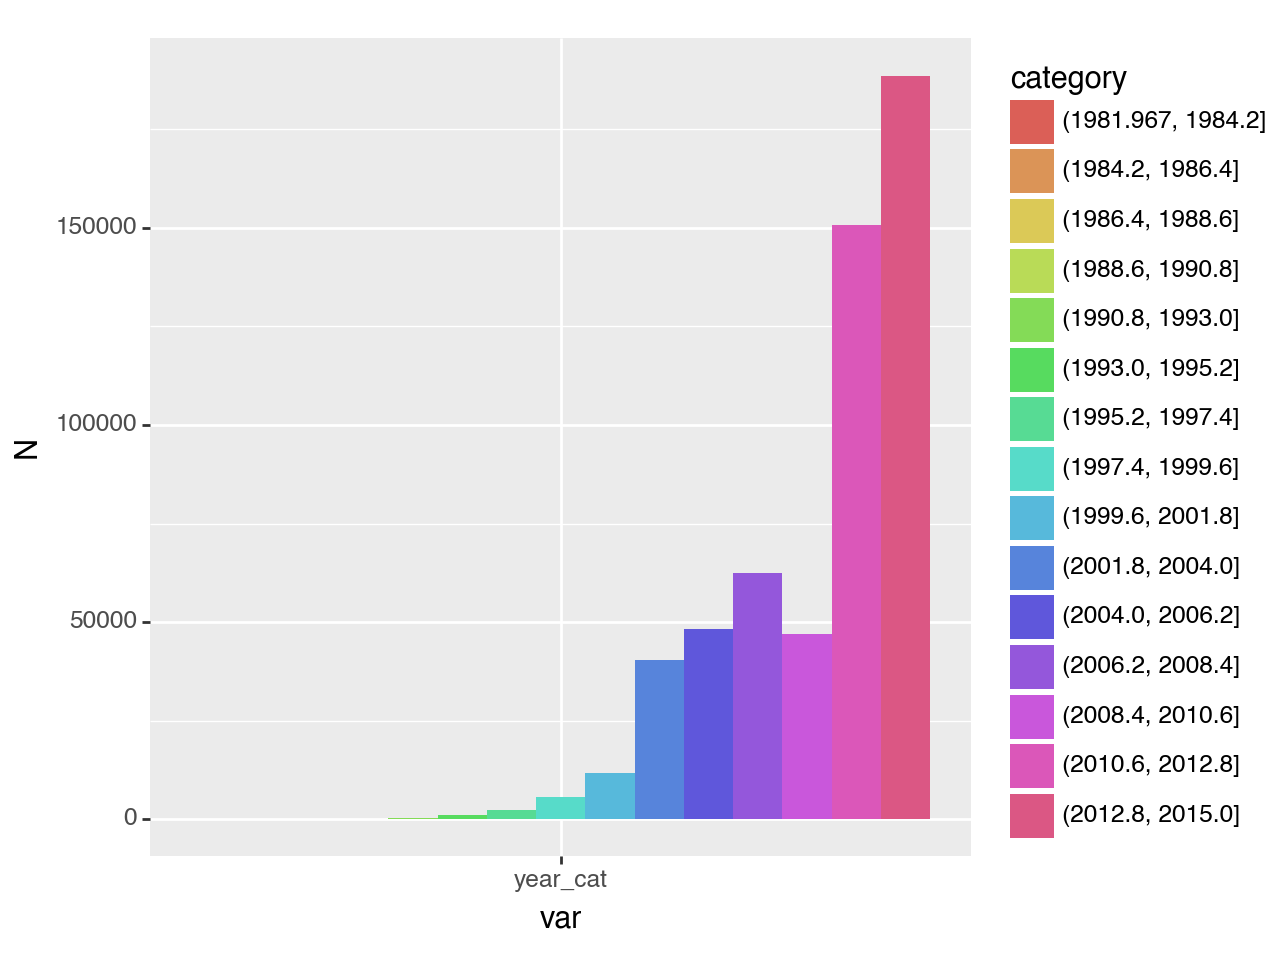

<Figure Size: (640 x 480)>

In [ ]:
# Creating 15 manufacturing year categories
prices_df = prices_df.assign(year_cat = pd.cut(prices_df['year'], 15))
generate_freq_plot(generate_freq_table(prices_df, ['year_cat']))

/Users/mikestein/anaconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 227'. Pick better value with 'binwidth'.


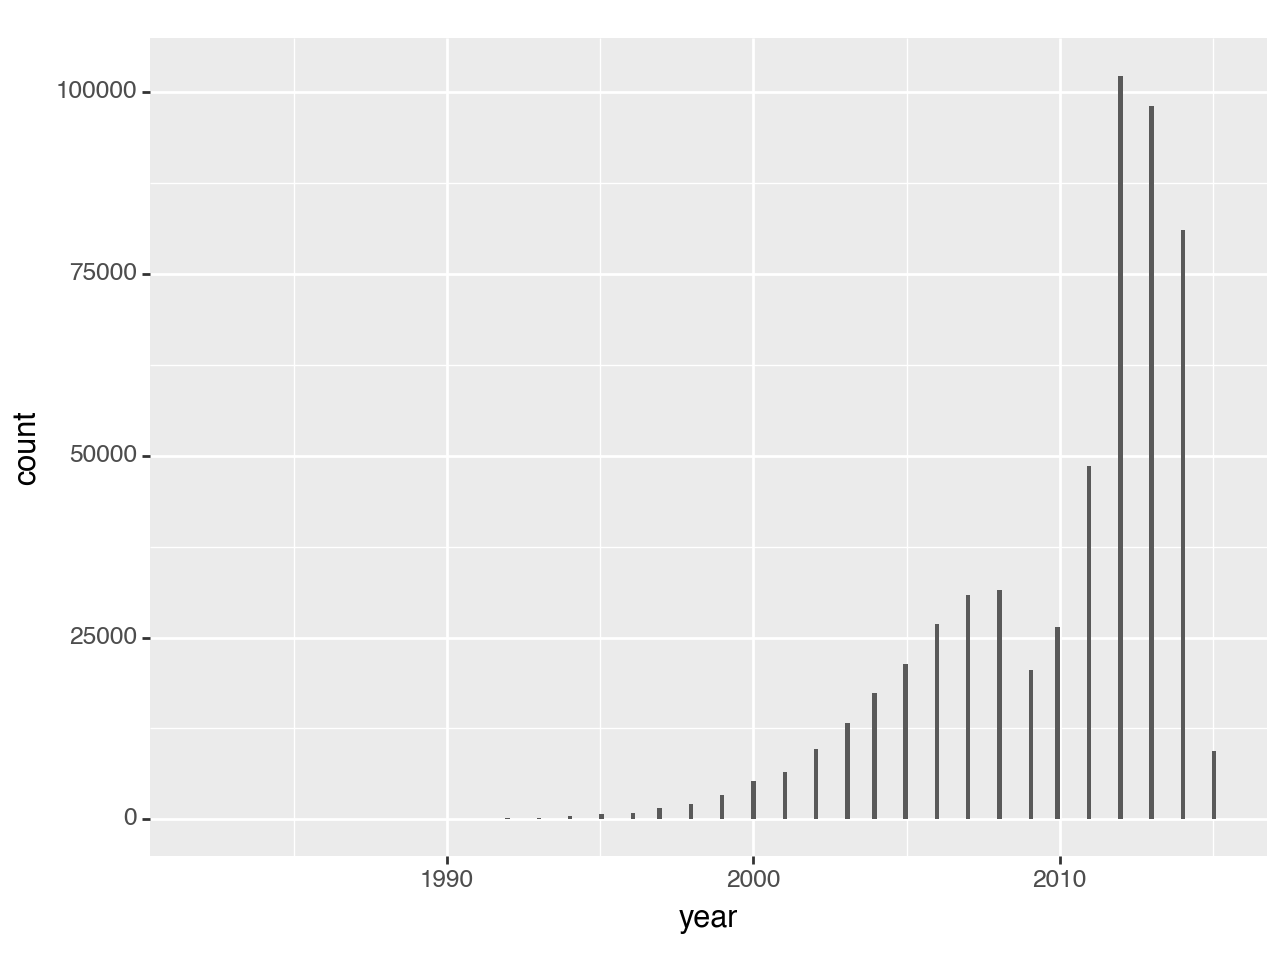

<Figure Size: (640 x 480)>

/Users/mikestein/anaconda3/lib/python3.11/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 228'. Pick better value with 'binwidth'.


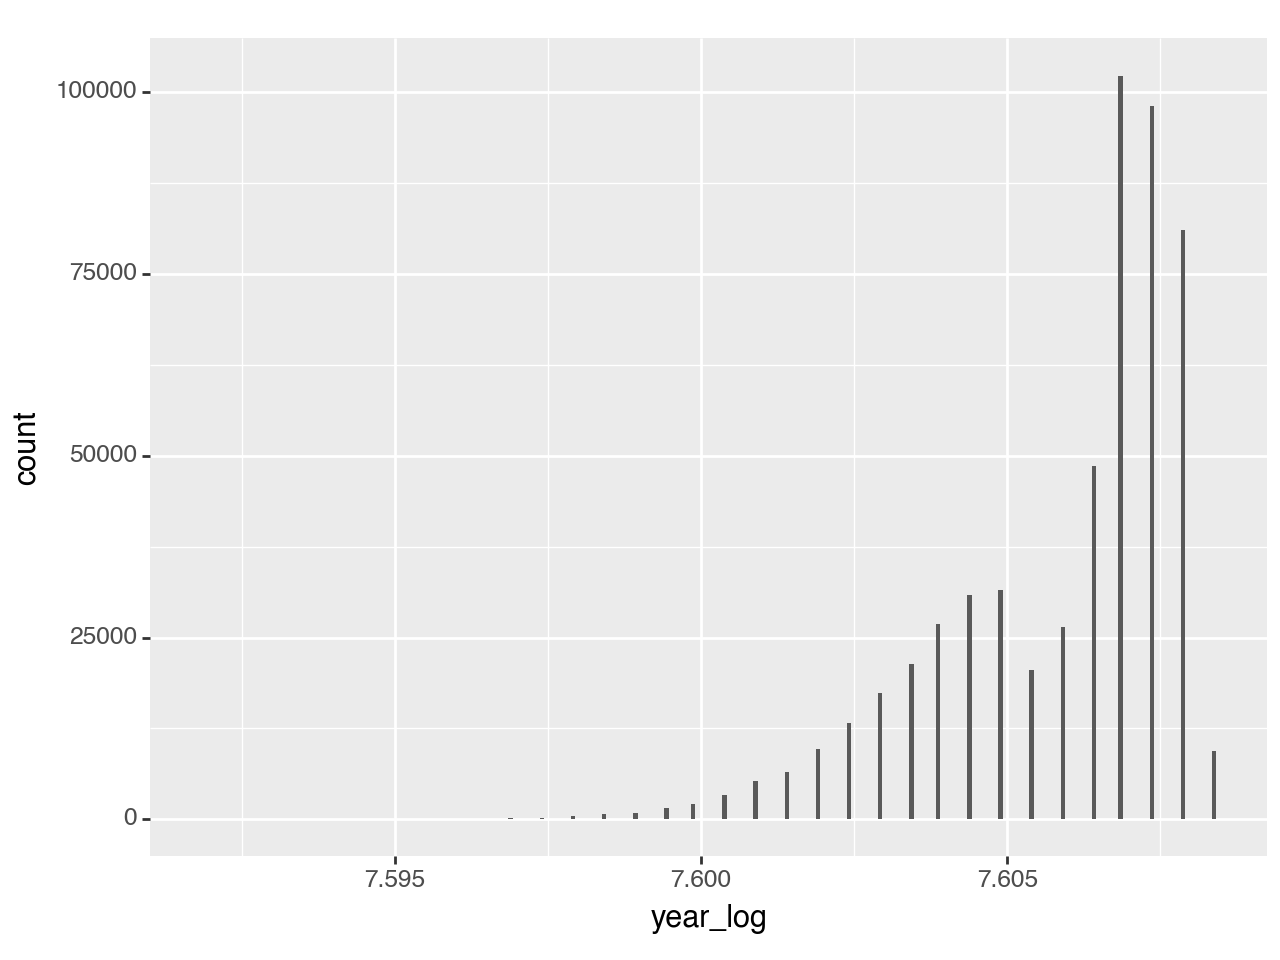

<Figure Size: (640 x 480)>

In [ ]:
# first we look at what the log transformation does
(
    ggplot(prices_df, aes(x='year')) +
    geom_histogram()
)

(
    ggplot(prices_df.assign(year_log = lambda x: np.log(x.year)), aes(x='year_log')) +
    geom_histogram()
)

In [ ]:
# let's try a boxcox transform
# first we find the box-cox transforms of the age column
year_boxed = scipy.stats.boxcox(prices_df.year) # returns a tuple with (1) vector of transformed values, (2) lambda value found by the optimizer. The lambda value specifies the exact closed-form of the transforming function
year_boxed_v = year_boxed[0] # the transformed values
year_boxed_lambda = year_boxed[1] # the lambda value found by the optimizer

# the age variable now looks closer to normal, although the gaps in the range show that this approach has limited 
# value for an inherently discrete variable like age. However, for continuous variables this can substantially improve the performance of 
# your model
(
    ggplot(prices_df.assign(year_box = year_boxed_v), aes(x='year_box')) +
    geom_histogram()
)

# we can then apply the inverse transform using box_cox_inv and passing in the lambda value. This will transform
# the box-coxed age back to the original vector
year_boxed_inv = scipy.special.inv_boxcox(year_boxed_v, year_boxed_lambda)
print("Here's how the inverse of the box-coxed transformed age looks:")
print(year_boxed_inv)
print("Which is identical to the original value of age:")
print(prices_df.year.to_numpy())

/Users/mikestein/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:933: RuntimeWarning: overflow encountered in power
/Users/mikestein/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract


BracketError: The algorithm terminated without finding a valid bracket. Consider trying different initial points.